# **Google Play Store Market Analysis**

The dataset used was downloaded from __[Kaggle](https://www.kaggle.com/lava18/google-play-store-apps)__. It's a CSV file that contains the public metrics data of the apps in Google Play Store.<br>The contents of this Notebook are:

1. Data Cleaning and Wrangling
2. Data Exploration

***

# **Data Wrangling**

### Initialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore.csv')

### Data Overview

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Start Wrangling

**App Column**

In [6]:
df[df.duplicated(subset='App', keep=False)].sort_values('App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310,38M,"10,000,000+",Free,0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device


In [7]:
df.drop_duplicates(subset='App', inplace=True)
df.shape

(9660, 13)

**Category Column**

In [8]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [9]:
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


It seems that the data has been shifted to the left, so I need to shift it back

In [10]:
df.loc[df['Category']=='1.9','Category':] = df.loc[df['Category']=='1.9','Category':].shift(periods=1,axis="columns",fill_value='PHOTOGRAPHY')
df[df.index==10472]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


**Rating Column**

In [11]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [12]:
df['Rating'] = pd.to_numeric(df['Rating'], downcast='float')
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2], dtype=float32)

**Reviews Columnn**

In [13]:
df['Reviews'] = pd.to_numeric(df['Reviews'], downcast='integer')
df['Reviews'].dtype

dtype('int32')

**Size Column**

From data sampling, it shows that the size column has M order, K order, and 'Varies with device' values. For K order values, I convert them into M order values with the precision of 2 decimal numbers. For the 'Varies with device' values, I set them as NaN values.

In [14]:
df['Size'] = df['Size'].str.replace('M','')
df.loc[df['Size'].str.contains('k'), 'Size'] = (df.loc[df['Size'].str.contains('k'), 'Size'].str.replace('k', '').astype('float32')/1000).round(2)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce', downcast='float')
df['Size'].dtype

dtype('float32')

**Installs Column**

In [15]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [16]:
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','')
df['Installs'] = pd.to_numeric(df['Installs'], downcast='integer')
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int32)

**Type Column**

In [17]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [18]:
df[df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [19]:
df.loc[df['Type'].isnull(), 'Type'] = 'Free'

**Price Column**

In [20]:
df['Price'] = df['Price'].str.replace('$','')
df['Price'].replace('0', np.nan, inplace=True)
df['Price'] = pd.to_numeric(df['Price'], downcast='float')
df['Price'].dtype

dtype('float32')

**Content Rating Column**

In [21]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

**Genres Column**

In [22]:
df[df['Genres'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19,3.0,1000,Free,NaN,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [23]:
df.loc[df['Genres'].isna(), 'Genres'] = 'Photography'

**Last Updated Column**

In [24]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated'].dtype

dtype('<M8[ns]')

**Current Ver Column**

Nothing to fix

### Android Ver Column

Nothing to fix

***

# **Data Exploration**

Let's explore! Except for the first part, I use visualization to get insights.
1. Top App Finder
2. Univariate
>* Time-Series
>* Distribution
>* Proportion
3. Bivariate (in correlation with Rating)
>* vs Installs
>* vs Reviews
>* vs Size
>* vs Price
>* vs Category
4. Bivariate (free vs paid)
>* Installs
>* Rating
>* Size
5. Bivariate (top 10 categories)
>* by Total Installs
>* by Average Rating
>* by Average Size
6. Bivariate (others)
>* Reviews vs Installs
>* Size vs Installs
7. Multivariate
>* Price vs Installs by Category

In [25]:
df.reset_index(drop=True, inplace=True)

In [26]:
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9005,FA Player Essentials,SPORTS,5.0,7,68.0,100,Free,NaN,Everyone,Sports,2018-07-23,1.6.0,4.0.3 and up


### Top App Finder

In [27]:
category = 'TOOLS'
min_install = 1000000

if category=='':
    temp = df[df.Installs>=min_install]
else:
    temp = df[(df.Installs>=min_install)&(df.Category==category)]
    
temp.sort_values(by=['Rating','Reviews'], ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8673,File Manager by Xiaomi: release file storage s...,TOOLS,4.8,337532,15.0,10000000,Free,NaN,Everyone,Tools,2018-07-11,V1-180703,4.4 and up
2575,Calculator with Percent (Free),TOOLS,4.8,48211,7.4,1000000,Free,NaN,Everyone,Tools,2017-11-18,32.1,4.1 and up
6649,Calcy IV,TOOLS,4.8,36557,14.0,1000000,Free,NaN,Everyone,Tools,2018-08-03,2.51f,5.0 and up
3181,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,NaN,500000000,Free,NaN,Everyone,Tools,2018-08-03,Varies with device,Varies with device
6486,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,NaN,500000000,Free,NaN,Everyone,Tools,2018-08-04,4.6.6,Varies with device
4736,Kaspersky Mobile Antivirus: AppLock & Web Secu...,TOOLS,4.7,2598579,49.0,50000000,Free,NaN,Everyone,Tools,2018-07-24,11.17.4.1024,4.1 and up
2570,Brightest Flashlight Free ®,TOOLS,4.7,1335799,3.8,50000000,Free,NaN,Everyone,Tools,2017-10-27,2.5.2,4.2 and up
7810,"GO Security－AntiVirus, AppLock, Booster",TOOLS,4.7,1251479,NaN,10000000,Free,NaN,Everyone,Tools,2018-07-24,Varies with device,Varies with device
2573,CALCU™ Stylish Calculator Free,TOOLS,4.7,152692,11.0,5000000,Free,NaN,Everyone,Tools,2018-07-07,3.5.6,4.1 and up
7109,The Zueira's Voice,TOOLS,4.7,136540,3.1,1000000,Free,NaN,Everyone,Tools,2018-07-10,4.75,4.0.3 and up


## Univariate

**Time-Series**

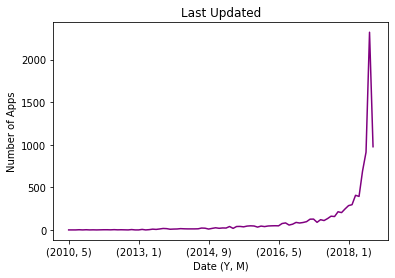

In [28]:
date_count = df.groupby([(df['Last Updated'].dt.year),(df['Last Updated'].dt.month)]).count()['App']
date_count.plot(title='Last Updated', ylabel='Number of Apps', xlabel='Date (Y, M)', color='purple')
plt.show()

**Distribution**

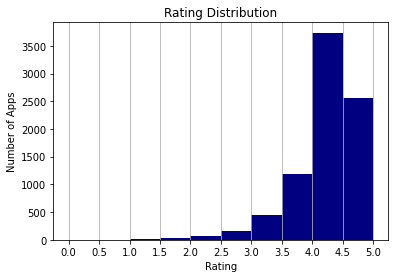

In [29]:
x = np.arange(0, 5.1, 0.5)
df.hist(column='Rating',bins=x, color="navy")
plt.title("Rating Distribution")
plt.grid(axis="y")
plt.xticks(x)
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()

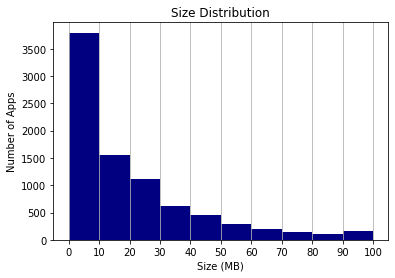

In [30]:
x = np.arange(0, 100.1, 10.0)
df.hist(column='Size',bins=x, color="navy")
plt.title("Size Distribution")
plt.grid(axis="y")
plt.xticks(x)
plt.xlabel('Size (MB)')
plt.ylabel('Number of Apps')
plt.show()

**Proportion**

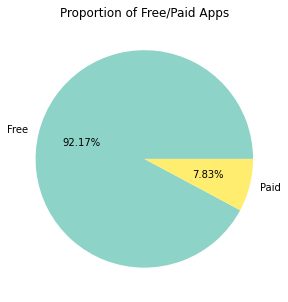

In [31]:
temp = df['Type'].value_counts(normalize=True)
temp.plot.pie(autopct='%1.2f%%', figsize=(5,5), title='Proportion of Free/Paid Apps', ylabel='', cmap='Set3')
plt.show()

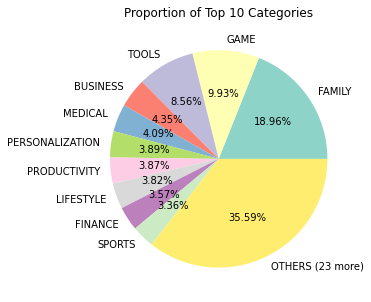

In [32]:
n = 10
temp = df['Category'].value_counts(normalize=True)
temp = pd.concat([temp.head(n),pd.Series([temp.tail(len(temp)-n).sum()], index=['OTHERS (' + str(len(temp)-n) + ' more)'])])
temp.plot.pie(autopct='%1.2f%%', figsize=(5,5), title='Proportion of Top ' + str(n) +' Categories', ylabel='',cmap="Set3")
plt.show()

## Bivariate (vs Rating)

**Installs**

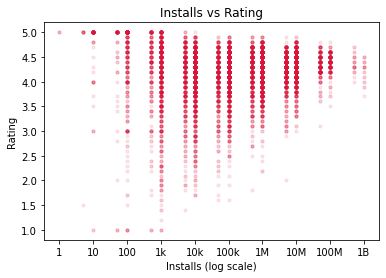

In [33]:
df.plot(x='Installs', y='Rating', kind='scatter', alpha=0.1, title='Installs vs Rating', s=10, color='crimson', logx=True)
plt.xticks(np.power(10,[0,1,2,3,4,5,6,7,8,9]), labels=['1','10','100','1k','10k','100k','1M','10M','100M','1B'])
plt.xlabel('Installs (log scale)')
plt.ylabel('Rating')
plt.show()

**Reviews**

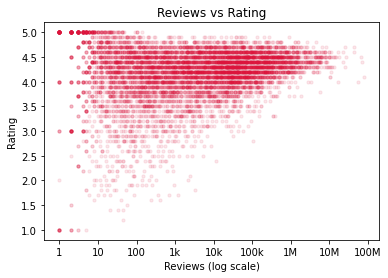

In [34]:
df.plot(x='Reviews', y='Rating', kind='scatter', alpha=0.1, title='Reviews vs Rating', s=10, color='crimson', logx=True)
plt.xticks(np.power(10,[0,1,2,3,4,5,6,7,8]), labels=['1','10','100','1k','10k','100k','1M','10M','100M'])
plt.xlabel('Reviews (log scale)')
plt.ylabel('Rating')
plt.show()

**Size**

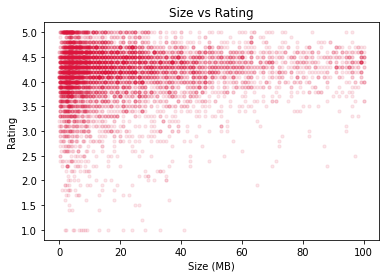

In [35]:
df.plot(x='Size', y='Rating', kind='scatter', alpha=0.1, title='Size vs Rating', s=10, color='crimson')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.show()

**Price**

I consider the apps priced above $50 are junk apps

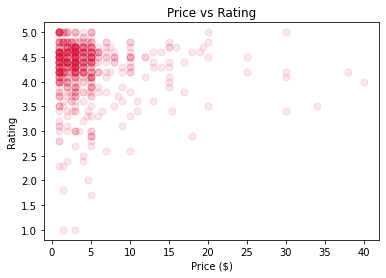

In [36]:
x = df[(df.Type=='Paid')&(df.Price<=50)]['Price']
y = df['Rating']
pd.DataFrame({'x':x,'y':y}).dropna().plot(x='x', y='y', kind='scatter', alpha=0.1, title='Price vs Rating', s=50, color='crimson')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.show()

**Category**

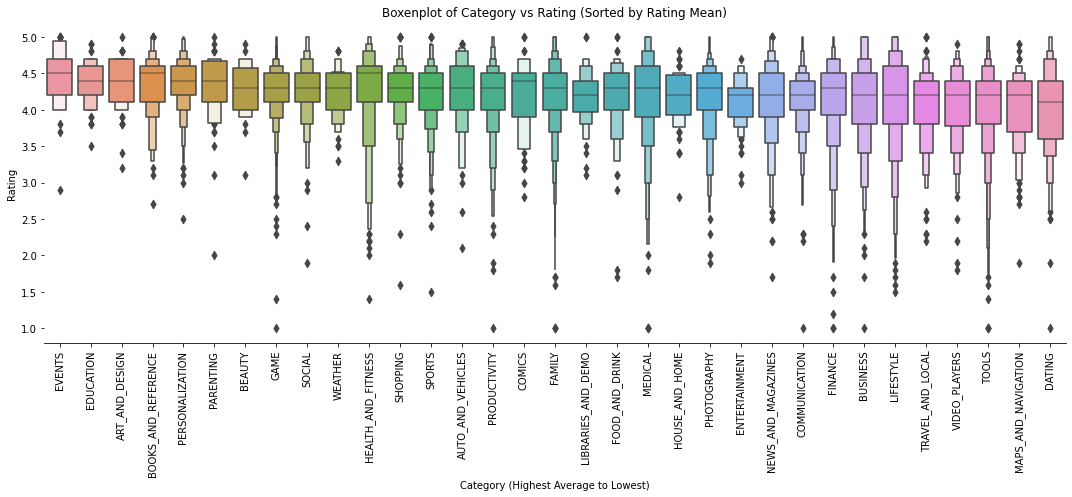

In [37]:
order = df.groupby('Category').mean()['Rating'].sort_values(ascending=False).index
temp = sns.catplot(x="Category", y="Rating", data=df, kind="boxen", height=5, aspect=3/1, order=order)
temp.despine(left=True)
temp.set_xticklabels(rotation=90)
temp.set_ylabels("Rating")
temp.set_xlabels("Category (Highest Average to Lowest)")

plt.title('Boxenplot of Category vs Rating (Sorted by Rating Mean)')
plt.show()

## Bivariate (paid vs free)

**Installs**

The white dots are the means

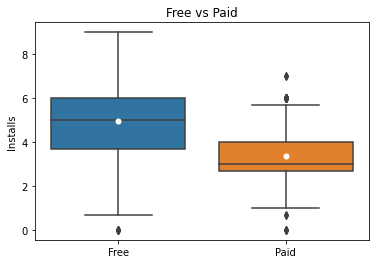

In [38]:
x = df['Type']
y = np.log10(df['Installs'][df.Reviews!=0])
temp = pd.DataFrame({'x':x,'y':y}).dropna()

sns.boxplot(x="x", y="y", data=temp, showmeans=True, meanprops={"marker": ".", "markeredgecolor": "white", "markerfacecolor":"white", "markersize": "10"})
plt.ylabel("Installs")
plt.xlabel('')

plt.title('Free vs Paid')
plt.show()

**Rating**

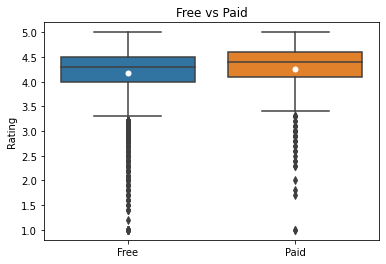

In [39]:
x = df['Type']
y = df['Rating']
temp = pd.DataFrame({'x':x,'y':y}).dropna()

sns.boxplot(x="x", y="y", data=temp, showmeans=True, meanprops={"marker": ".", "markeredgecolor": "white", "markerfacecolor":"white", "markersize": "10"})
plt.ylabel("Rating")
plt.xlabel('')

plt.title('Free vs Paid')
plt.show()

**Size**

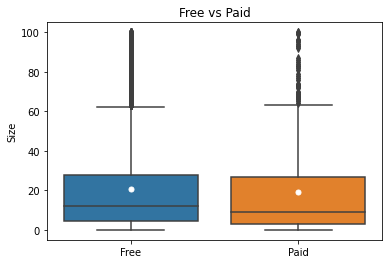

In [40]:
x = df['Type']
y = df['Size']
temp = pd.DataFrame({'x':x,'y':y}).dropna()

sns.boxplot(x="x", y="y", data=temp, showmeans=True, meanprops={"marker": ".", "markeredgecolor": "white", "markerfacecolor":"white", "markersize": "10"})
plt.ylabel("Size")
plt.xlabel('')

plt.title('Free vs Paid')
plt.show()

## Bivariate (top 10 categories)

**Total Installs**

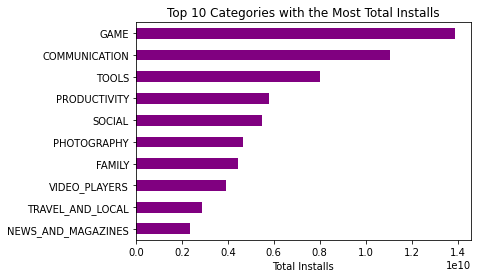

In [41]:
temp = df.groupby('Category').sum()['Installs'].sort_values().tail(10)
temp.plot(kind='barh',
          title='Top 10 Categories with the Most Total Installs',
          color='purple')
plt.xlabel('Total Installs')
plt.ylabel(None)
plt.show()

**Average Rating**

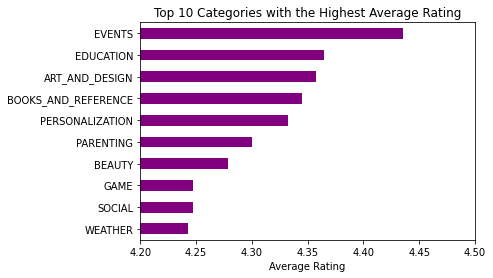

In [42]:
temp = df.groupby('Category').mean()['Rating'].sort_values().tail(10)
temp = temp.plot(kind='barh',
          title='Top 10 Categories with the Highest Average Rating',
          color='purple',
          xlim=(4.2,4.5))
plt.xlabel('Average Rating')
plt.ylabel(None)
plt.show()

**Average Size**

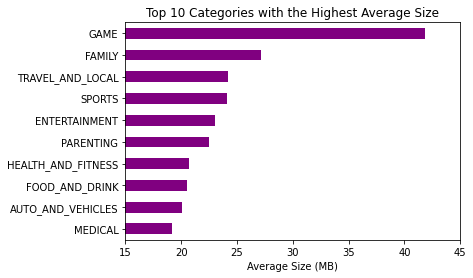

In [43]:
temp = df.groupby('Category').mean()['Size'].sort_values().tail(10)
temp = temp.plot(kind='barh',
          title='Top 10 Categories with the Highest Average Size',
          color='purple',
          xlim=(15,45))
plt.xlabel('Average Size (MB)')
plt.ylabel(None)
plt.show()

## Bivariate (others)

**Reviews vs Installs**

The previous logarithmic method doesn't seem to work, so I use another method

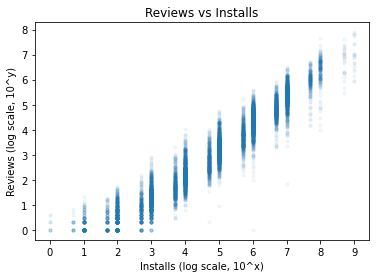

In [44]:
x = np.log10(df['Installs'][df.Installs!=0])
y = np.log10(df['Reviews'][df.Reviews!=0])
temp = pd.DataFrame({'x':x,'y':y}).dropna().plot(x='x', y='y', kind='scatter', alpha=0.05, title='Reviews vs Installs', s=10)
temp.set_xticks(np.arange(0, 10, 1))
plt.xlabel('Installs (log scale, 10^x)')
plt.ylabel('Reviews (log scale, 10^y)')
plt.show()

**Size vs Installs**

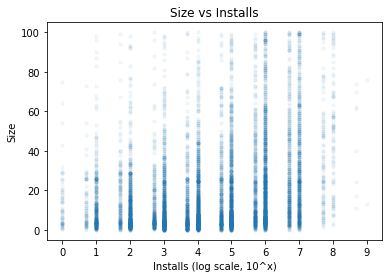

In [45]:
x = np.log10(df['Installs'][df.Installs!=0])
y = df['Size']
temp = pd.DataFrame({'x':x,'y':y}).dropna().plot(x='x', y='y', kind='scatter', alpha=0.05, title='Size vs Installs', s=10)
temp.set_xticks(np.arange(0, 10, 1))
plt.xlabel('Installs (log scale, 10^x)')
plt.ylabel('Size')
plt.show()

## Multivariate

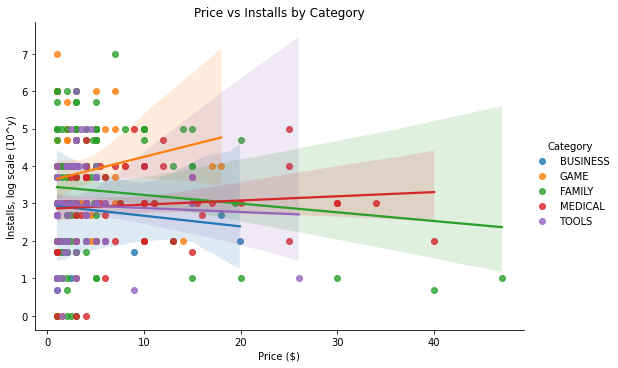

In [46]:
temp = df[df['Category'].isin(df['Category'].value_counts().head().index)]
y = np.log10(temp['Installs'][temp.Installs!=0])
x = temp[temp.Price<=50]['Price']
z = temp['Category']

g = sns.FacetGrid(data = pd.DataFrame({'x':x,'y':y,'z':z}).dropna(), hue='z', height=5, aspect=1.5)
g = g.map(sns.regplot, 'x' ,'y', x_jitter=0.01 , fit_reg=True);
g.add_legend(title='Category')
plt.title('Price vs Installs by Category')
plt.xlabel('Price ($)')
plt.ylabel('Installs, log scale (10^y)');